# Manifold Learning - The S Dataset

## Example code is using the following template
http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html
    
### Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>

Automatically created module for IPython interactive environment


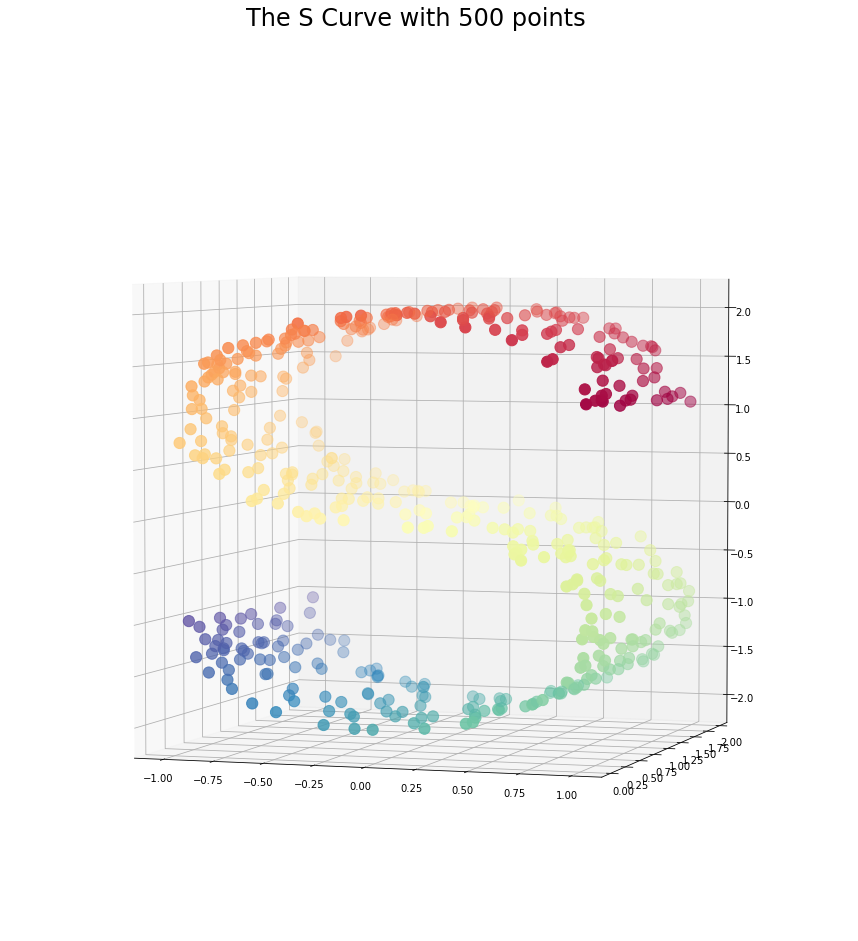

In [1]:
# Adjustments by S.Kuehn, stefan.kuehn@xing.com

print(__doc__)

from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
%matplotlib inline
from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 500
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)

fig = plt.figure(figsize=(15, 15))
plt.suptitle("The S Curve with %i points"
             % (n_points), fontsize=24)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral,s=125)
ax.view_init(4, -72)


## Manifold Learning Methods

standard: 0.13 sec
ltsa: 0.13 sec
hessian: 0.18 sec
modified: 0.12 sec
Isomap: 0.14 sec
MDS: 0.29 sec
SpectralEmbedding: 0.031 sec
t-SNE: 13 sec


(-177.646654465378,
 134.71698985356159,
 -108.87438736046123,
 104.72788009727763)

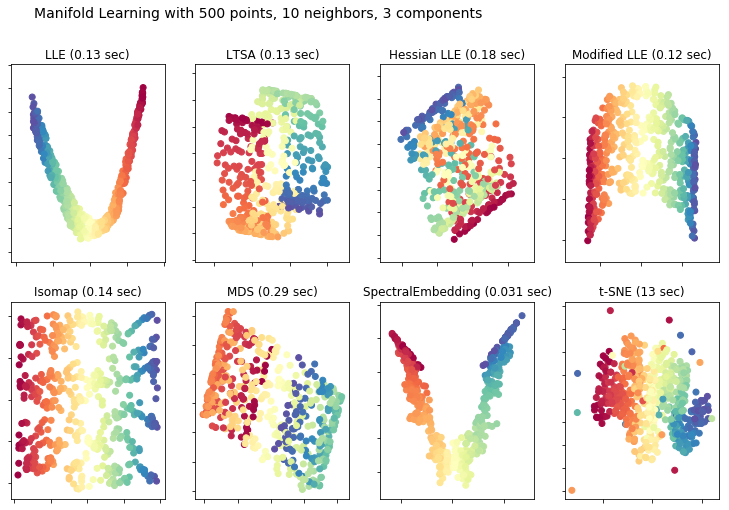

In [2]:
# Let's re-run the example
# In case you experience problems with any of the methods that are using eigen_solver='auto', try switching to eigen_solver='dense'
# Runtime for more than 1000 points can be up to 2 minutes (due to tSNE, try less n_points)

#n_points = 500
n_neighbors = 10
n_components = 3

fig = plt.figure(figsize=(16, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors, %i components"
             % (n_points, n_neighbors, n_components), fontsize=14)

methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(X)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(259)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

## Oh, I made a tiny change to the example, let's use the original settings

standard: 0.084 sec
ltsa: 0.11 sec
hessian: 0.17 sec
modified: 0.11 sec
Isomap: 0.092 sec
MDS: 0.43 sec
SpectralEmbedding: 0.027 sec
t-SNE: 10 sec


(-47.51858344334428, 43.80440726536576, -11.538499737627983, 12.29333868110943)

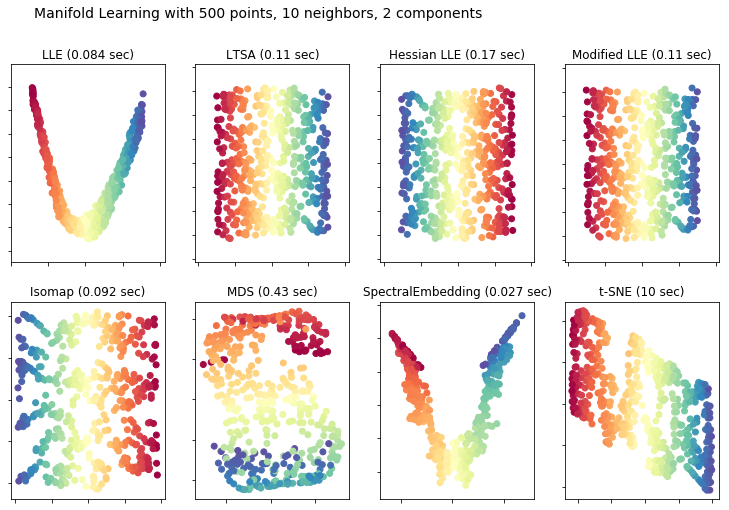

In [3]:
# Let's re-run the example
# In case you experience problems with any of the methods that are using eigen_solver='auto', try switching to eigen_solver='dense'
# Runtime for more than 1000 points can be up to 2 minutes

#n_points = 500
n_neighbors = 10
n_components = 2 # This is the parameter that I changed to 3 in the above example

fig = plt.figure(figsize=(16, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors, %i components"
             % (n_points, n_neighbors, n_components), fontsize=14)

methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(X)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(259)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

## We can be much faster when using Random Projections

http://scikit-learn.org/stable/modules/random_projection.html

(-2.479441592420288, 2.479456126845492, -2.478448399018923, 2.4789113990212934)

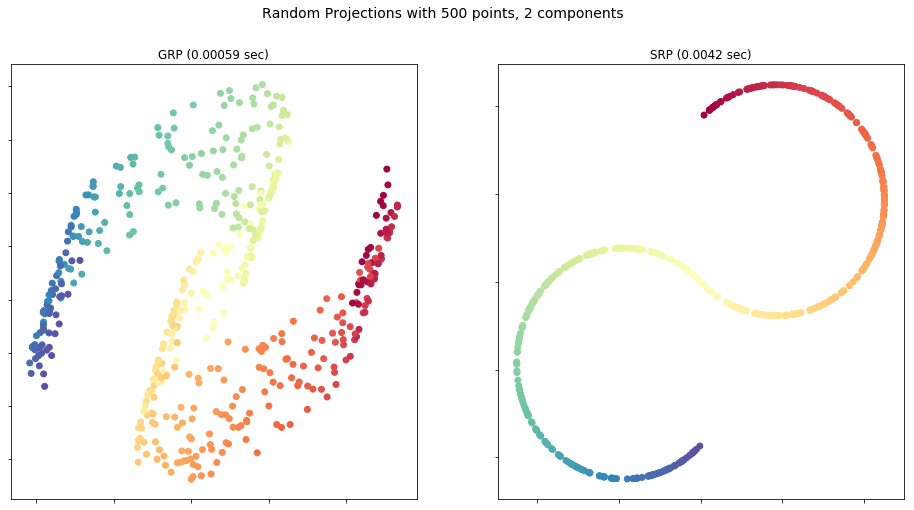

In [4]:
from sklearn import random_projection

fig = plt.figure(figsize=(16, 8))
plt.suptitle("Random Projections with %i points, %i components"
             % (n_points, n_components), fontsize=14)

init_random_state=0

t0 = time()
transformer = random_projection.GaussianRandomProjection(n_components=2, random_state=init_random_state)
Y = transformer.fit_transform(X)
t1 = time()
    
ax = fig.add_subplot(121)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('GRP', t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
transformer = random_projection.SparseRandomProjection(n_components=2, random_state=init_random_state)
Y = transformer.fit_transform(X)
t1 = time()
    
ax = fig.add_subplot(121+1)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('SRP', t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')



## Last but not least: PCA

(-2.161335011959947,
 2.2623047987496547,
 -1.3180237507886758,
 1.396369266264818)

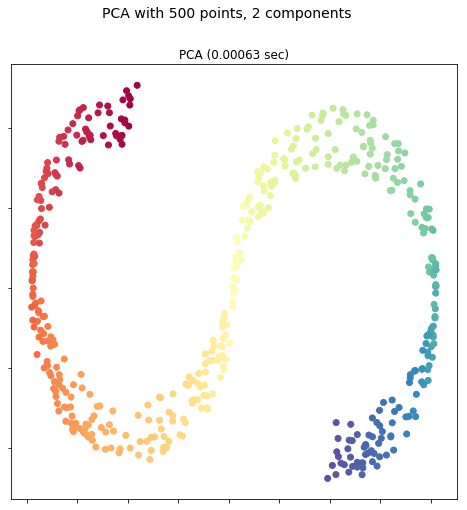

In [6]:
from sklearn.decomposition import PCA

fig = plt.figure(figsize=(8, 8))
plt.suptitle("PCA with %i points, %i components"
             % (n_points, n_components), fontsize=14)

init_random_state=0

t0 = time()
pca = PCA(n_components=2)
Y = pca.fit_transform(X)
t1 = time()
    
ax = fig.add_subplot(111)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('PCA', t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


In [6]:
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)